In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file= 'titanic_full.csv'

df=pd.read_csv(file)


## Exploratory data analysis (EDA)

In [3]:
df.head(3)



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN,3.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN,1.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,14?,NaN,3.0


In [4]:
df1=df[['PassengerId', 'Survived', 'Pclass','Name','Sex','Age', 'SibSp', 'Parch','Ticket', 'Fare', 'Cabin', 'Embarked']]

In [5]:
df1.shape

(1309, 12)

In [6]:
df1.columns.unique

<bound method Index.unique of Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')>

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [8]:
df1.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [9]:
#cek duplikasi row data
#df1.duplicated().sum()
#cek duplikasi data
df1.PassengerId.duplicated().sum()

0

In [10]:
# Cek kemungkinan fitur yang berguna
#ekstrak titel nama
df1.Name.str.extract('([A-Za-z]+)\.').value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Ms            2
Major         2
Mme           1
Capt          1
Lady          1
Jonkheer      1
Dona          1
Don           1
Countess      1
Sir           1
dtype: int64

# mengecek label/ variabel target

In [11]:
df1.Survived.unique()

array([ 0.,  1., nan])

In [12]:
#mengecek data uniq pada Cabin
#df1.Cabin.nunique()

#df1.sort_values(['Cabin'], ascending=True)


# statistik dasar

In [15]:
df1.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [16]:
df1.describe(include="O")


,Name,Sex,Ticket,Cabin,Embarked
count,1309,1309,1309,295,1307
unique,1307,2,929,186,3
top,"Connolly, Miss. Kate",male,CA. 2343,C23 C25 C27,S
freq,2,843,11,6,914


In [17]:
matrix_corr=df1.corr()
matrix_corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.038354,0.028814,-0.055224,0.008942,0.031428
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.038354,-0.338481,1.000000,-0.408106,0.060832,0.018322,-0.558629
Age,0.028814,-0.077221,-0.408106,1.000000,-0.243699,-0.150917,0.178740
SibSp,-0.055224,-0.035322,0.060832,-0.243699,1.000000,0.373587,0.160238
Parch,0.008942,0.081629,0.018322,-0.150917,0.373587,1.000000,0.221539
Fare,0.031428,0.257307,-0.558629,0.178740,0.160238,0.221539,1.000000


<AxesSubplot:>

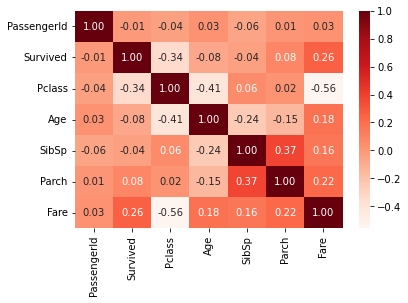

In [18]:
sns.heatmap(matrix_corr, annot=True, cmap="Reds", fmt=".2f")


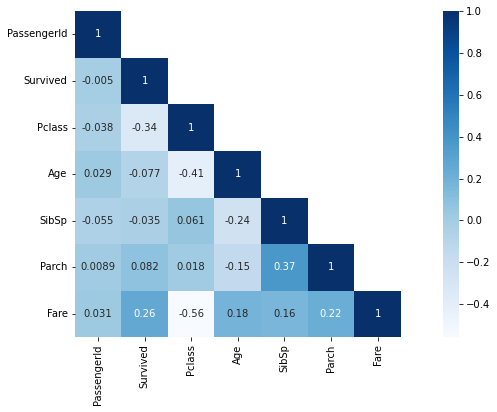

In [19]:
#Corelation matrix.
cor_mat = df1[:].corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig = plt.gcf()
fig.set_size_inches(15, 6)
sns.heatmap(data=cor_mat, mask=mask, cmap="Blues", square=True, annot=True, cbar=True)
plt.show()


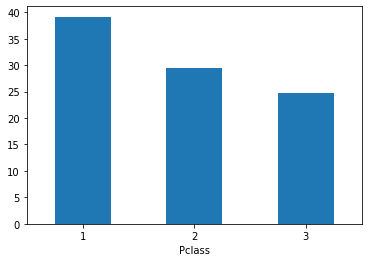

In [25]:
df1_grouped=df1.groupby(by="Pclass").mean()
df1_grouped.Age.plot.bar()
plt.xticks(rotation=0)
plt.show()




In [26]:
df1_grouped=df1.groupby(by="Pclass").mean()
df1_grouped

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,672.492260,0.629630,39.159930,0.436533,0.365325,87.508992
2,671.566787,0.472826,29.506705,0.393502,0.368231,21.179196
3,640.558533,0.242363,24.816367,0.568406,0.400564,13.302889


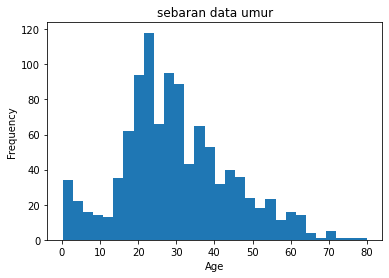

In [17]:
df1.Age.plot.hist(bins=30)
plt.xlabel('Age')
plt.title('sebaran data umur')
plt.show()

C:\Users\yoga\miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


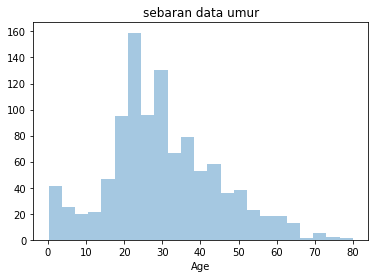

In [18]:
sns.distplot(df1.Age, kde=False)
plt.xlabel('Age')
plt.title('sebaran data umur')
plt.show()


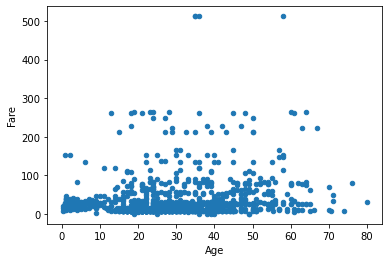

In [19]:
df1.plot.scatter(x="Age", y="Fare")
plt.show()

<AxesSubplot:>

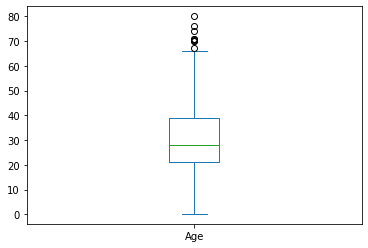

In [90]:
df1.Age.plot.box()

# plt.boxplot(df1['Age'].value_counts(), labels=['Age'] )
# plt.title("simple box plot")
# plt.xlabel('sumbu x')
# plt.ylabel('sumbu y')
# plt.grid()
# plt.show()

# eksplorasi variabel

## data Kategorik

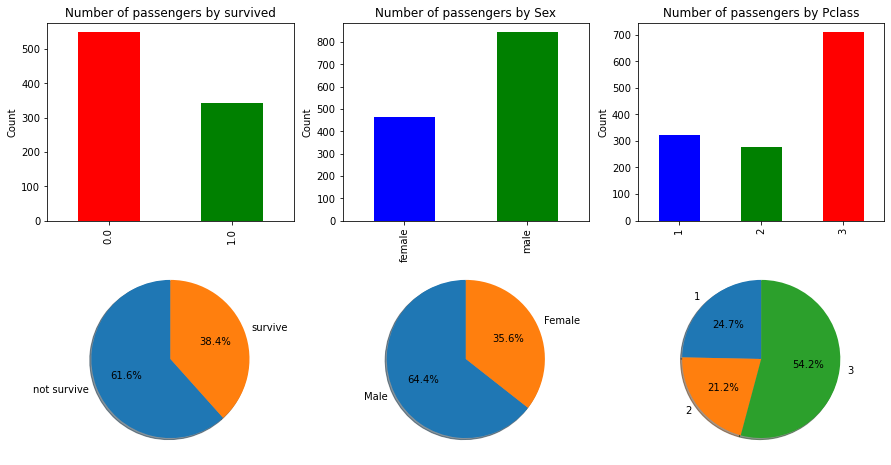

In [118]:
fig, ax = plt.subplots(2, 3, figsize=(15, 8))

#subplot 1
df1['Survived'].value_counts().sort_index().plot.bar(color=['red', 'green'], ax=ax[0][0])
ax[0][0].set_title('Number of passengers by survived')
ax[0][0].set_ylabel("Count")


#subplot 2
df1['Sex'].value_counts().sort_index().plot.bar(color=['blue', 'green'], ax=ax[0][1])
ax[0][1].set_title('Number of passengers by Sex')
ax[0][1].set_ylabel("Count")

#subplot 3
df1['Pclass'].value_counts().sort_index().plot.bar(color=['blue', 'green', 'red'], ax=ax[0][2])
ax[0][2].set_title('Number of passengers by Pclass')
ax[0][2].set_ylabel("Count")


#subplot 4
ax[1][0].pie(x=df1.Survived.value_counts(), labels=["not survive", "survive"], autopct='%1.1f%%', shadow=True, startangle=90)

#subplot 5
ax[1][1].pie(x=df1.Sex.value_counts(), labels=["Male", "Female"], autopct='%1.1f%%', shadow=True, startangle=90)

#subplot 6
ax[1][2].pie(x=df1.Pclass.value_counts().sort_index(), labels=['1','2','3'], autopct='%1.1f%%', shadow=True, startangle=90)


plt.show()


# data kategorik vs target (dependent)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

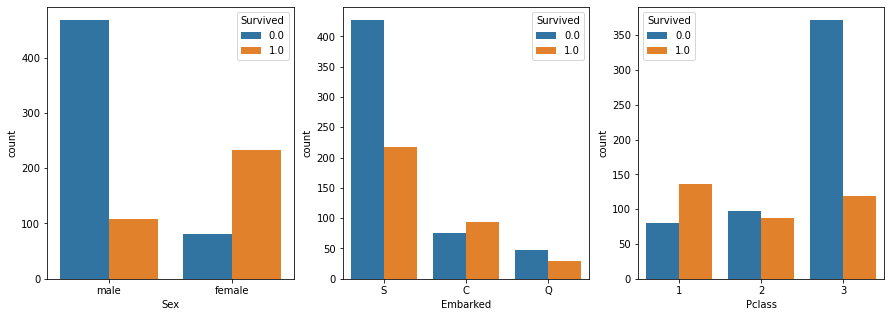

In [127]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
#subplot 1
sns.countplot(data=df1, x="Sex", ax=ax[0], hue="Survived")
#subplot 2
sns.countplot(data=df1, x="Embarked", ax=ax[1], hue="Survived")

#subplot 3
sns.countplot(data=df1, x="Pclass", ax=ax[2], hue="Survived")



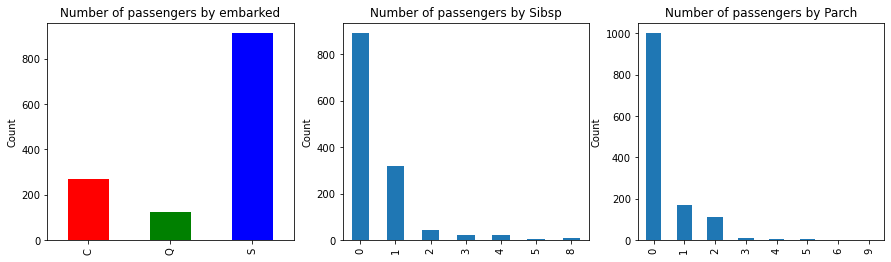

In [128]:
fig, ax=plt.subplots(1,3, figsize=(15,4))

#subplot 1
df1['Embarked'].value_counts().sort_index().plot.bar(color=['red','green', 'blue'], ax=ax[0])
ax[0].set_title('Number of passengers by embarked')
ax[0].set_ylabel("Count")

#subplot 2
df1['SibSp'].value_counts().sort_index().plot.bar(ax=ax[1])
ax[1].set_title('Number of passengers by Sibsp')
ax[1].set_ylabel("Count")

#subplot 3
df1['Parch'].value_counts().sort_index().plot.bar(ax=ax[2])
ax[2].set_title('Number of passengers by Parch')
ax[2].set_ylabel("Count")

plt.show()


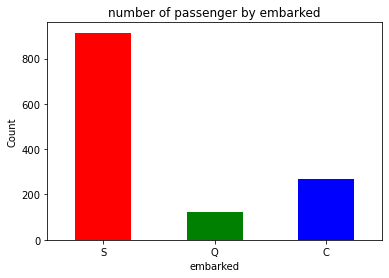

In [223]:
#versi 1 graph
df1.Embarked.value_counts().sort_index(ascending=False).plot.bar(color=['red','green','blue'])
plt.xlabel("embarked")
plt.ylabel('Count')
plt.title("number of passenger by embarked")
plt.xticks(rotation=0)
plt.show()

# Checking data distribution from age and fare

Text(0, 0.5, 'frequency')

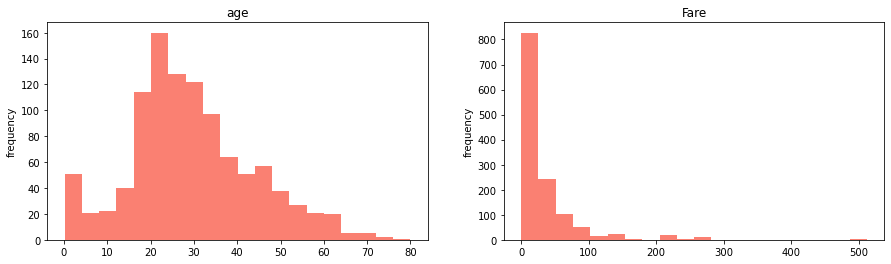

In [245]:
f, ax=plt.subplots(1,2, figsize= (15,4))

df1.Age.plot.hist(bins=20, ax=ax[0], color="salmon")
ax[0].set_title('age')
ax[0].set_ylabel("frequency")

df1.Fare.plot.hist(bins=20, ax=ax[1], color="salmon")
ax[1].set_title('Fare')
ax[1].set_ylabel("frequency")


# Check Outliers

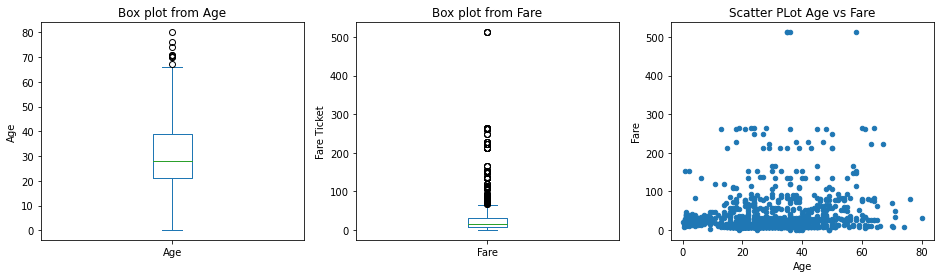

In [147]:
f, ax=plt.subplots(1,3, figsize= (16,4))

df1.Age.plot.box(ax=ax[0])
ax[0].set_ylabel('Age')
ax[0].set_title("Box plot from Age")

df1.Fare.plot.box(ax=ax[1])
ax[1].set_ylabel('Fare Ticket')
ax[1].set_title("Box plot from Fare")

df1.plot.scatter(x='Age', y='Fare',ax=ax[2])
ax[2].set_title("Scatter PLot Age vs Fare")

plt.show()

# checking outlier with plotting age and fare

<AxesSubplot:xlabel='[Age]', ylabel='[Fare]'>

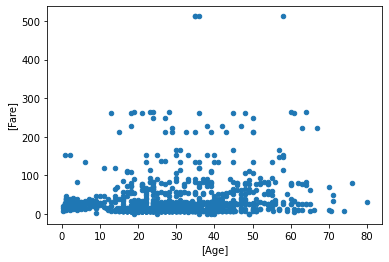

In [153]:
df1.plot.scatter(x=['Age'], y=['Fare'])

# bivariate Analysis

In [254]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# checking for duplicate data

In [28]:
df1.duplicated().sum()

# if the data has duplicate rows and we want to remove "the whole" duplicate rows, we use:
#df1.drop.duplicates(inplace=True)

0

# handling Missing value

In [29]:
df1.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

<AxesSubplot:>

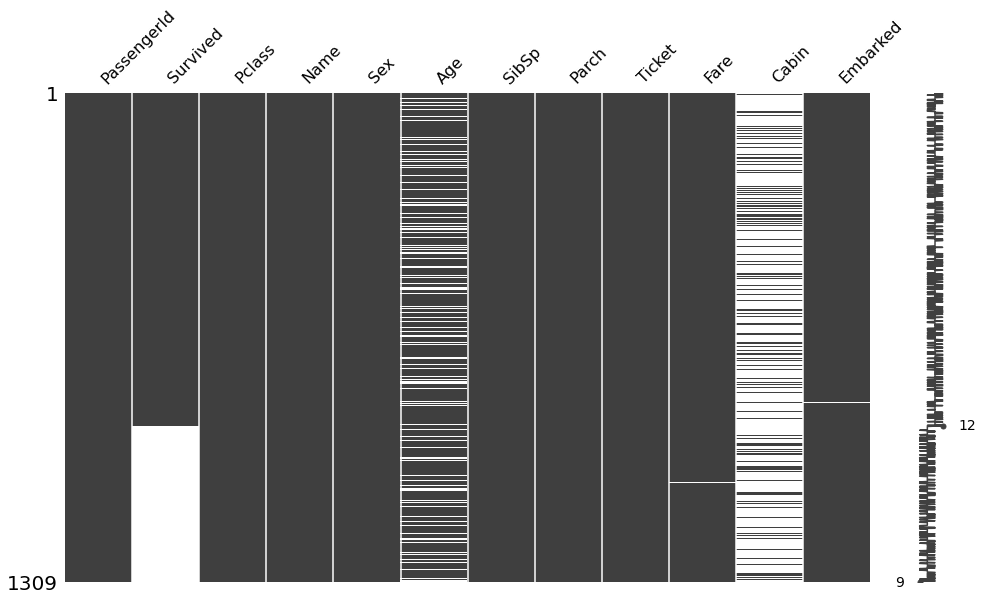

In [32]:
import missingno as msno

msno.matrix(df1, figsize=(16,9))

In [44]:
df1.dropna(subset=["Survived"], how="any", inplace=True)

C:\Users\yoga\miniconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [45]:
df1.shape

(891, 12)

<AxesSubplot:>

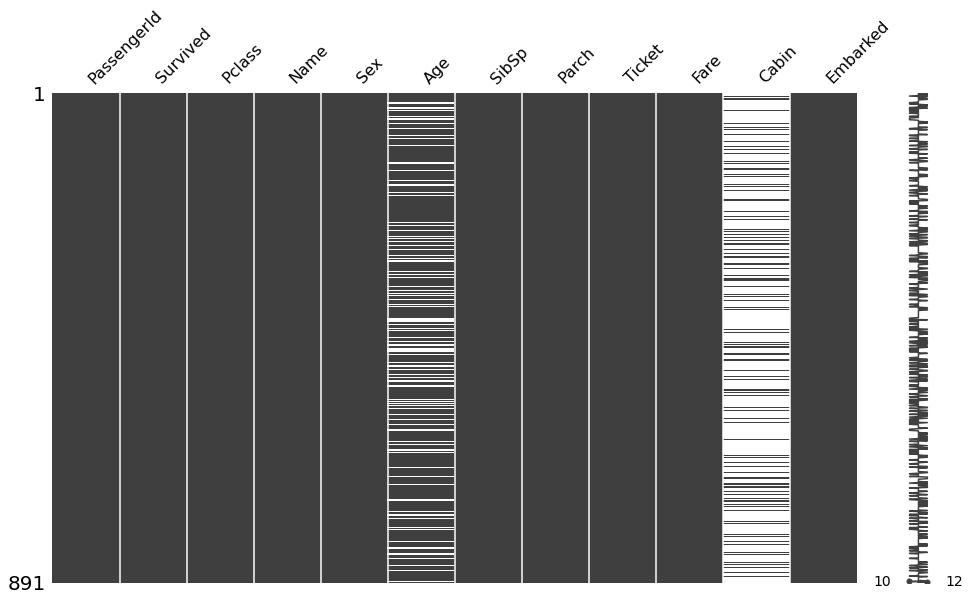

In [47]:
msno.matrix(df1, figsize=(16, 9))


<AxesSubplot:title={'center':'Distribution data from Age'}, ylabel='Frequency'>

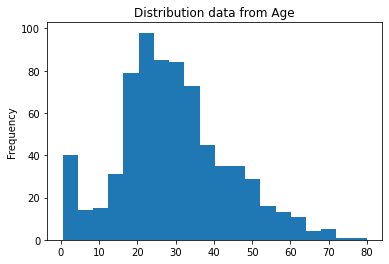

In [51]:
df1.Age.plot.hist(title= "Distribution data from Age", bins=20)

In [52]:
# Melihat kecondongan distribusi kolom, kecondongan yang baik itu antara-1 s.d. 1
df1.Age.skew()

0.38910778230082704

In [53]:
df1['Age_mean_uni']=df1.Age.fillna(df1.Age.mean())
df1['Age_median_uni'] = df1.Age.fillna(df1.Age.median())


C:\Users\yoga\AppData\Local\Temp/ipykernel_5616/70775038.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Age_mean_uni']=df1.Age.fillna(df1.Age.mean())
C:\Users\yoga\AppData\Local\Temp/ipykernel_5616/70775038.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Age_median_uni'] = df1.Age.fillna(df1.Age.median())


In [73]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_mean_uni,Age_median_uni
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,22.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,38.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,26.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,35.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0,35.0


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Age_mean_uni'}>],
       [<AxesSubplot:title={'center':'Age_median_uni'}>, <AxesSubplot:>]],
      dtype=object)

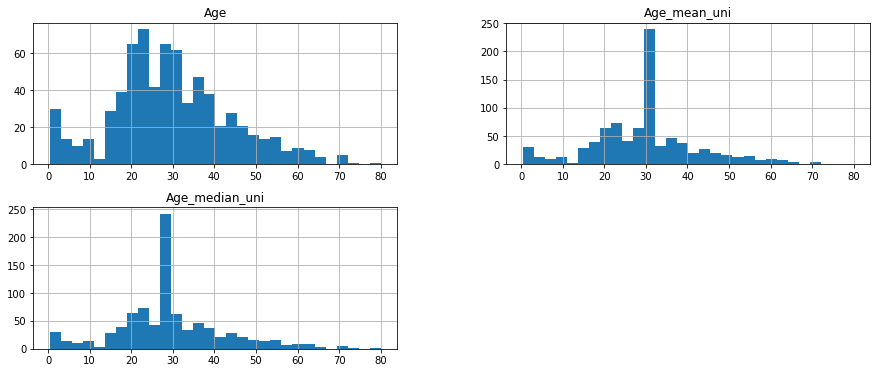

In [63]:
df1[['Age', 'Age_mean_uni', 'Age_median_uni']].hist( bins=30, figsize=(15,6))
plt.show()


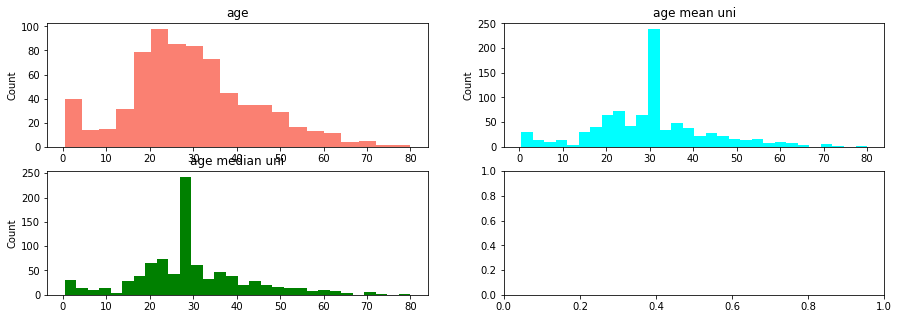

In [80]:
# sama dengan atas, hanya menggunakan oop
f, ax = plt.subplots(2, 2, figsize=(15, 5))

df1.Age.plot.hist(bins=20, ax=ax[0][0], color="salmon")
ax[0][0].set_title('age')
ax[0][0].set_ylabel("Count")

df1.Age_mean_uni.plot.hist(bins=30, ax=ax[0][1], color="aqua")
ax[0][1].set_title('age mean uni')
ax[0][1].set_ylabel("Count")

df1.Age_median_uni.plot.hist(bins=30, ax=ax[1][0], color="green")
ax[1][0].set_title('age median uni')
ax[1][0].set_ylabel("Count")

plt.show()


In [61]:
#skewness sebelum dan sesudah imputasi
df1[['Age','Age_mean_uni','Age_median_uni']].skew()

Age               0.389108
Age_mean_uni      0.434488
Age_median_uni    0.510245
dtype: float64

In [96]:
df_grouped=df1[['Sex','Age']].groupby(['Sex']).mean()
df_grouped

,Age
Sex,
female,27.915709
male,30.726645


In [104]:
#imputasi untuk male group

#filter kondisi
condition= df1['Sex']=="male" 


#tangkap nilai mean untuk laki-laki
mean_male= df_grouped.loc['male', 'Age']

# Imputasi
df1.loc[condition,'Age_mean_multi']=df1.loc[condition, "Age"].fillna(mean_male)


In [105]:
#imputasi untuk female group

#filter kondisi
condition = df1['Sex'] == "female"

#tangkap nilai mean untuk laki-laki
mean_female = df_grouped.loc['female', 'Age']

df1.loc[condition, 'Age_mean_multi'] = df1.loc[condition, "Age"].fillna(mean_female)


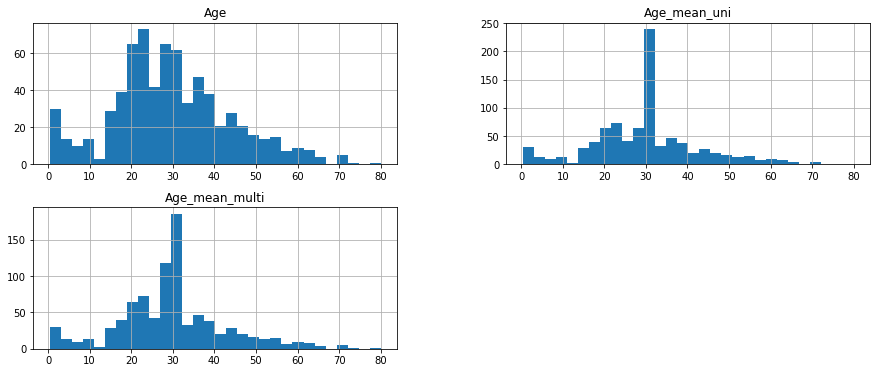

In [109]:
#melihat histogram sebelum dan sesudah imputasi

df1[['Age','Age_mean_uni','Age_mean_multi']].hist(bins=30, figsize=(15,6))

plt.show()

In [110]:
df1[["Age","Age_mean_uni","Age_mean_multi"]].skew()

Age               0.389108
Age_mean_uni      0.434488
Age_mean_multi    0.424586
dtype: float64